In [1]:
import getpass
import random
from pathlib import Path
import datetime
import tempfile
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib
from matplotlib.dates import DateFormatter

In [2]:
def get_text():
    with requests.Session() as session:
        session.post(
            'https://stackoverflow.com/users/login',
            dict(email=input('email: '),
                 password=getpass.getpass('password: '),)
        )
        req = session.get('https://stackoverflow.com/reputation')
        req.raise_for_status()
        return req.text

In [3]:
def parse_text(text):
    lines = text.splitlines()
    dates = []
    scores = []
    for line in lines:
        line = line.strip()
        if line.startswith('--') and 'bonuses' not in line:
            # line looks like this: -- 2013-11-10 rep +30   = 88 
            _, d, _, s, _, _ = line.split()
            dates.append(d)
            scores.append(int(s))
    return dates, scores
    

In [4]:
text = get_text()

email: aaronchall@yahoo.com
password: ········


In [5]:
text

'        <html><head></head><body><pre>total votes: 12228\r\n 16   299737 (2)\r\n-- 2013-07-17 rep +2    = 3         \n 16 14302815 (2)\r\n-- 2013-07-19 rep +2    = 5         \n 16  6470452 (2)\r\n-- 2013-09-25 rep +2    = 7         \n 16 13865482 (2)\r\n 16 18845512 (2)\r\n-- 2013-09-29 rep +4    = 11        \n 16  1251929 (2)\r\n-- 2013-10-29 rep +2    = 13        \n 2  19799478 (10)\r\n-- 2013-11-05 rep +10   = 23        \n-- 2013-11-06 rep 0     = 23        \n-- 2013-11-07 rep 0     = 23        \n 2  19829714 (10)\r\n-- 2013-11-08 rep +10   = 33        \n 2  19872537 (10)\r\n 1  19883078 (15)\r\n-- 2013-11-09 rep +25   = 58        \n 2  19885310 (10)\r\n 2  19883078 (10)\r\n 2  19876459 (10)\r\n-- 2013-11-10 rep +30   = 88        \n 2  19899905 (10)\r\n 2  19899905 (10)\r\n 2  19900464 (10)\r\n 2  19912895 (10)\r\n 2  19912895 (10)\r\n-- 2013-11-11 rep +50   = 138       \n 1  19912895 (15)\r\n 2  19912895 (10)\r\n 2  19912895 (10)\r\n-- 2013-11-12 rep +35   = 173       \n 3  199593

In [7]:
dates, scores = parse_text(text)
list(zip(dates[:10], scores[:10]))

[('2013-07-17', 2),
 ('2013-07-19', 2),
 ('2013-09-25', 2),
 ('2013-09-29', 4),
 ('2013-10-29', 2),
 ('2013-11-05', 10),
 ('2013-11-06', 0),
 ('2013-11-07', 0),
 ('2013-11-08', 10),
 ('2013-11-09', 25)]

In [8]:
df = pd.DataFrame(data=dict(score=scores), index=pd.to_datetime(dates))

In [9]:
df


,score
2013-07-17,2
2013-07-19,2
2013-09-25,2
2013-09-29,4
2013-10-29,2
2013-11-05,10
2013-11-06,0
2013-11-07,0
2013-11-08,10
2013-11-09,25


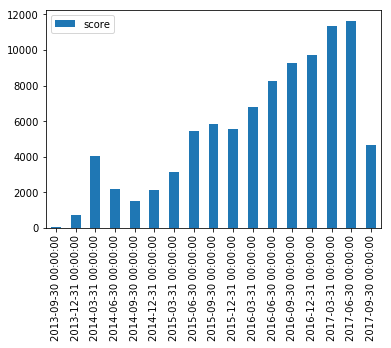

In [13]:
%matplotlib inline
period = 'Q'
periodic_totals = df.resample(period).sum()
periodic_totals.plot.bar()

In [14]:
help(df.resample)

Help on method resample in module pandas.core.generic:

resample(rule, how=None, axis=0, fill_method=None, closed=None, label=None, convention='start', kind=None, loffset=None, limit=None, base=0, on=None, level=None) method of pandas.core.frame.DataFrame instance
    Convenience method for frequency conversion and resampling of time
    series.  Object must have a datetime-like index (DatetimeIndex,
    PeriodIndex, or TimedeltaIndex), or pass datetime-like values
    to the on or level keyword.
    
    Parameters
    ----------
    rule : string
        the offset string or object representing target conversion
    axis : int, optional, default 0
    closed : {'right', 'left'}
        Which side of bin interval is closed
    label : {'right', 'left'}
        Which bin edge label to label bucket with
    convention : {'start', 'end', 's', 'e'}
    loffset : timedelta
        Adjust the resampled time labels
    base : int, default 0
        For frequencies that evenly subdivide 1 day